In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits import mplot3d
import numpy as np
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
import collections
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier

In [2]:
weather_df = pd.read_csv('/home/jimit/MastersProject/weather_albany.csv')
weather_df.head(5)

,Name,Date time,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity,Conditions
0,"Albany, NY, United States",03/16/2017,30.4,18.7,24.7,4.1,NaN,0.0,0.0,17.28,27.5,295.00,39.1,9.9,37.6,50.14,Partially cloudy
1,"Albany, NY, United States",03/17/2017,38.7,19.3,29.6,10.0,NaN,0.0,0.0,15.23,18.7,290.58,27.0,9.9,29.6,45.90,Partially cloudy
2,"Albany, NY, United States",03/18/2017,41.7,13.2,29.1,8.1,NaN,0.0,0.0,13.58,8.8,137.00,19.7,9.9,56.4,50.00,Partially cloudy
3,"Albany, NY, United States",03/19/2017,43.7,31.5,36.3,24.8,NaN,0.0,0.0,12.00,15.4,84.63,21.9,9.9,45.8,46.27,Partially cloudy
4,"Albany, NY, United States",03/20/2017,46.8,19.9,35.2,16.0,NaN,0.0,0.0,9.93,9.9,302.25,19.7,9.9,33.8,47.48,Partially cloudy


In [3]:
weather_df.shape

(1462, 17)

In [4]:
weather_df.drop(['Heat Index', 'Conditions','Wind Gust', 'Date time', 'Name'], 'columns', inplace = True)

In [5]:
weather_df[weather_df.isnull().any(axis=1)].count()

Maximum Temperature    575
Minimum Temperature    575
Temperature            575
Wind Chill               0
Precipitation          575
Snow                   575
Snow Depth             575
Wind Speed             575
Wind Direction         575
Visibility             575
Cloud Cover            575
Relative Humidity      575
dtype: int64

In [6]:
weather_df = weather_df.dropna()


In [7]:
weather_df.shape

(887, 12)

In [8]:
weather_df.describe()

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
count,887.00000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000,887.000000
mean,45.06956,29.591206,37.447012,23.367756,0.095265,0.275851,1.735862,15.472830,210.213811,9.064825,67.199211,65.174498
std,14.20950,12.041475,12.644354,14.923707,0.222397,0.892231,3.159656,5.942354,67.400190,1.499783,22.045058,13.378823
min,3.40000,-8.400000,-1.400000,-30.500000,0.000000,0.000000,0.000000,4.200000,27.460000,1.500000,0.000000,27.190000
25%,35.60000,21.400000,29.650000,13.800000,0.000000,0.000000,0.000000,10.800000,157.815000,8.900000,51.900000,55.175000
50%,44.10000,30.500000,37.000000,24.600000,0.000000,0.000000,0.000000,15.100000,214.920000,9.800000,71.300000,65.370000
75%,55.95000,38.500000,46.800000,34.300000,0.080000,0.040000,2.075000,19.550000,272.415000,9.900000,84.250000,75.005000
max,84.60000,50.000000,67.400000,49.600000,2.390000,10.440000,19.700000,38.000000,336.460000,9.900000,100.000000,98.920000


In [9]:
weather_corr = weather_df.corr()
weather_corr

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity
Maximum Temperature,1.000000,0.860034,0.966964,0.888874,0.003629,-0.269825,-0.468352,-0.028690,-0.249314,0.185736,-0.083368,-0.014555
Minimum Temperature,0.860034,1.000000,0.951518,0.963036,0.123520,-0.208246,-0.455936,-0.012296,-0.173574,0.011073,0.218652,0.189525
Temperature,0.966964,0.951518,1.000000,0.955177,0.055439,-0.250978,-0.475639,-0.015385,-0.218499,0.113091,0.059475,0.077931
Wind Chill,0.888874,0.963036,0.955177,1.000000,0.090519,-0.229159,-0.462329,-0.159124,-0.279436,0.026660,0.155957,0.206899
Precipitation,0.003629,0.123520,0.055439,0.090519,1.000000,0.323739,0.074632,0.050000,-0.162264,-0.618982,0.295203,0.418411
Snow,-0.269825,-0.208246,-0.250978,-0.229159,0.323739,1.000000,0.408752,-0.034959,-0.054237,-0.392457,0.149863,0.126949
Snow Depth,-0.468352,-0.455936,-0.475639,-0.462329,0.074632,0.408752,1.000000,0.021340,0.093690,-0.220967,0.071724,0.064091
Wind Speed,-0.028690,-0.012296,-0.015385,-0.159124,0.050000,-0.034959,0.021340,1.000000,0.441721,0.094448,0.012220,-0.250487
Wind Direction,-0.249314,-0.173574,-0.218499,-0.279436,-0.162264,-0.054237,0.093690,0.441721,1.000000,0.220648,-0.122098,-0.252468
Visibility,0.185736,0.011073,0.113091,0.026660,-0.618982,-0.392457,-0.220967,0.094448,0.220648,1.000000,-0.421749,-0.567598


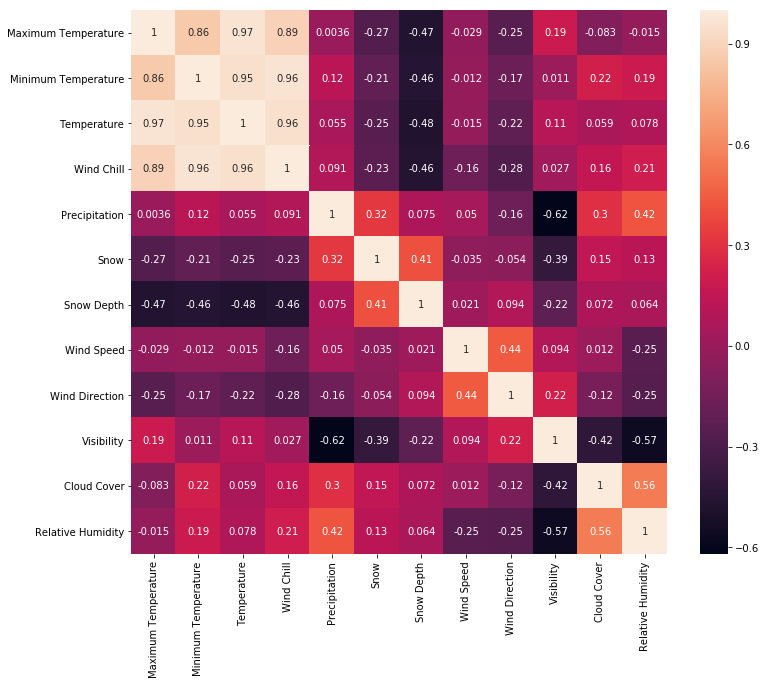

In [10]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(weather_corr, annot=True)

In [11]:
weather_df['Wind Direction'][2]

137.0

[2 2 1 1 2 2 2 2 1 0 1 1 1 2 0 1 1 2 1 1 0 0 2 2 0 0 0 2 1 1 2 1 1 1 1 0 2
 1 1 1 1 0 2 1 1 2 2 2 2 1 1 0 2 1 1 2 1 1 0 2 0 2 2 1 0 1 1 1 1 1 2 0 1 1
 1 2 0 1 0 2 1 0 0 0 1 0 1 0 1 2 2 1 1 0 1 0 2 0 2 2 0 2 2 1 0 2 2 1 0 0 2
 1 1 1 1 2 2 0 1 2 0 0 2 2 0 2 2 1 0 2 2 1 1 0 0 2 2 2 2 0 2 2 0 0 2 2 2 2
 0 2 0 0 0 2 2 1 1 2 2 2 0 0 1 0 2 2 0 0 2 0 0 2 0 2 0 0 2 0 1 2 0 0 1 2 2
 0 0 2 0 2 0 0 0 0 0 2 1 2 2 0 1 0 2 2 2 1 1 2 2 2 2 1 2 2 2 2 0 2 2 0 1 2
 2 2 1 1 1 0 1 2 0 2 0 1 0 2 0 2 2 2 0 0 1 0 1 1 0 2 2 2 2 2 2 1 0 1 2 1 0
 2 2 0 0 1 1 1 1 2 1 1 1 1 0 1 2 2 0 1 2 0 2 0 0 2 0 1 0 2 0 0 0 0 2 0 0 1
 2 2 1 1 2 2 1 2 2 0 0 2 1 0 2 0 1 2 2 2 0 1 0 1 2 2 2 2 0 1 0 2 2 0 2 2 0
 2 0 0 1 1 2 1 2 2 0 1 1 2 2 0 2 0 1 0 2 0 0 2 0 0 0 0 2 2 0 2 2 2 2 0 0 2
 0 0 0 1 2 2 2 1 0 2 0 0 0 1 2 0 2 0 0 1 0 1 1 0 2 2 1 1 0 0 0 2 0 0 2 0 0
 2 1 0 2 2 0 0 1 2 0 2 2 2 2 0 1 1 2 2 0 1 0 2 2 2 2 1 1 2 2 0 2 2 0 0 0 0
 0 2 1 0 2 0 0 1 0 2 0 1 1 2 2 1 1 0 2 0 2 2 0 0 1 1 1 0 1 2 1 1 1 2 2 0 2
 0 1 1 1 0 2 2 1 1 1 1 1 

Text(0,0.5,'Wind Speed in miles')

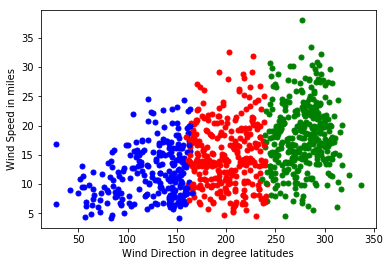

In [12]:

model = KMeans(n_clusters=3)
model.fit(weather_df)
all_predictions = model.predict(weather_df)


centroids = model.cluster_centers_
labels = model.labels_
print(labels)

colors = ["r.", "b.", "g."]

for i in range(len(weather_df)):
    line = plt.plot(weather_df.iloc[i]["Wind Direction"], weather_df.iloc[i]["Wind Speed"], colors[labels[i]], markersize=10)

plt.xlabel("Wind Direction in degree latitudes")
plt.ylabel("Wind Speed in miles")

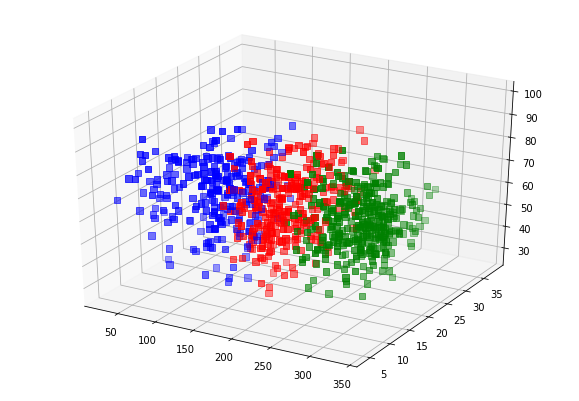

In [13]:

LABEL_COLOR_MAP = {0 : 'r',
                   1 : 'b',
                   2 : 'g'
                   }

label_color = [LABEL_COLOR_MAP[l] for l in labels]

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection = "3d")

x1 = np.array(weather_df["Wind Direction"])
x2 = np.array(weather_df["Wind Speed"])
x3 = np.array(weather_df["Relative Humidity"])

ax.scatter(x1, x2, x3, marker="s", c=label_color, s=40)
plt.show()

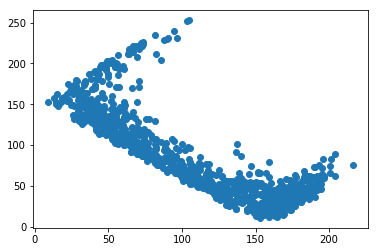

In [14]:

tsne_model = TSNE(learning_rate=1000)
transformed = model.fit_transform(weather_df)
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]
plt.scatter(x_axis, y_axis)
plt.show()

In [15]:
print(labels)

[2 2 1 1 2 2 2 2 1 0 1 1 1 2 0 1 1 2 1 1 0 0 2 2 0 0 0 2 1 1 2 1 1 1 1 0 2
 1 1 1 1 0 2 1 1 2 2 2 2 1 1 0 2 1 1 2 1 1 0 2 0 2 2 1 0 1 1 1 1 1 2 0 1 1
 1 2 0 1 0 2 1 0 0 0 1 0 1 0 1 2 2 1 1 0 1 0 2 0 2 2 0 2 2 1 0 2 2 1 0 0 2
 1 1 1 1 2 2 0 1 2 0 0 2 2 0 2 2 1 0 2 2 1 1 0 0 2 2 2 2 0 2 2 0 0 2 2 2 2
 0 2 0 0 0 2 2 1 1 2 2 2 0 0 1 0 2 2 0 0 2 0 0 2 0 2 0 0 2 0 1 2 0 0 1 2 2
 0 0 2 0 2 0 0 0 0 0 2 1 2 2 0 1 0 2 2 2 1 1 2 2 2 2 1 2 2 2 2 0 2 2 0 1 2
 2 2 1 1 1 0 1 2 0 2 0 1 0 2 0 2 2 2 0 0 1 0 1 1 0 2 2 2 2 2 2 1 0 1 2 1 0
 2 2 0 0 1 1 1 1 2 1 1 1 1 0 1 2 2 0 1 2 0 2 0 0 2 0 1 0 2 0 0 0 0 2 0 0 1
 2 2 1 1 2 2 1 2 2 0 0 2 1 0 2 0 1 2 2 2 0 1 0 1 2 2 2 2 0 1 0 2 2 0 2 2 0
 2 0 0 1 1 2 1 2 2 0 1 1 2 2 0 2 0 1 0 2 0 0 2 0 0 0 0 2 2 0 2 2 2 2 0 0 2
 0 0 0 1 2 2 2 1 0 2 0 0 0 1 2 0 2 0 0 1 0 1 1 0 2 2 1 1 0 0 0 2 0 0 2 0 0
 2 1 0 2 2 0 0 1 2 0 2 2 2 2 0 1 1 2 2 0 1 0 2 2 2 2 1 1 2 2 0 2 2 0 0 0 0
 0 2 1 0 2 0 0 1 0 2 0 1 1 2 2 1 1 0 2 0 2 2 0 0 1 1 1 0 1 2 1 1 1 2 2 0 2
 0 1 1 1 0 2 2 1 1 1 1 1 

Feature: Maximum Temperature, Score: 0.02865
Feature: Minimum Temperature, Score: 0.01936
Feature: Temperature, Score: 0.02708
Feature: Wind Chill, Score: 0.03990
Feature: Precipitation, Score: 0.00885
Feature: Snow, Score: 0.01076
Feature: Snow Depth, Score: 0.00866
Feature: Wind Speed, Score: 0.05837
Feature: Wind Direction, Score: 0.71019
Feature: Visibility, Score: 0.02330
Feature: Cloud Cover, Score: 0.02541
Feature: Relative Humidity, Score: 0.03948


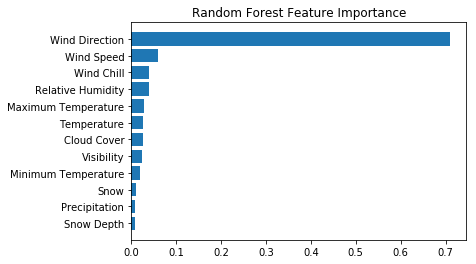

In [16]:

rfdict = {}
rf = RandomForestClassifier()
rf.fit(weather_df, labels)
sorted_idx = rf.feature_importances_.argsort()
plt.barh(weather_df.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.title("Random Forest Feature Importance")
for i in range(12):
    print('Feature: %s, Score: %.5f' % (weather_df.columns[i],rf.feature_importances_[i]))
    rfdict[weather_df.columns[i]] = rf.feature_importances_[i]

In [17]:
rfdict

{'Maximum Temperature': 0.028650906975963453,
 'Minimum Temperature': 0.019363131115502925,
 'Temperature': 0.027075219429625548,
 'Wind Chill': 0.039899716134247504,
 'Precipitation': 0.008848076834363037,
 'Snow': 0.010763598074618618,
 'Snow Depth': 0.00865537038202913,
 'Wind Speed': 0.05836732835879623,
 'Wind Direction': 0.7101857599073924,
 'Visibility': 0.023303342360720087,
 'Cloud Cover': 0.02540697111528949,
 'Relative Humidity': 0.0394805793114516}

In [18]:
sorted_idx

array([ 6,  4,  5,  1,  9, 10,  2,  0, 11,  3,  7,  8])

In [19]:
winddir = weather_df["Wind Direction"]
countN = 0
North = []
countNNE = 0
NorthNorthEast = []
countNE = 0
NorthEast = []
countENE = 0
EastNorthEast = []
countE = 0
East = []
countESE = 0
EastSouthEast = []
countSE = 0
SouthEast = []
countSSE = 0
SouthSouthEast = []
countS = 0
South = []
countSSW = 0
SouthSouthWest = []
countSW = 0
SouthWest = []
countWSW = 0
WestSouthWest = []
countW = 0
West = []
countWNW = 0
WestNorthWest = []
countNW = 0
NorthWest = []
countNNW = 0
NorthNorthWest = []
for i in range(len(winddir.values)):
    if(winddir.values[i] >=350 or winddir.values[i] <=10):
        countN +=1
        North.append(winddir.values[i])
    if(winddir.values[i] >10 and winddir.values[i] <=30):
        countNNE +=1
        NorthNorthEast.append(winddir.values[i])
    if(winddir.values[i] >30 and winddir.values[i] <=50):
        countNE +=1
        NorthEast.append(winddir.values[i])
    if(winddir.values[i] >50 and winddir.values[i] <=70):
        countENE +=1
        EastNorthEast.append(winddir.values[i])
    if(winddir.values[i] >70 and winddir.values[i] <=100):
        countE +=1
        East.append(winddir.values[i])
    if(winddir.values[i] >100 and winddir.values[i] <=120):
        countESE +=1
        EastSouthEast.append(winddir.values[i])
    if(winddir.values[i] >120 and winddir.values[i] <=140):
        countSE +=1
        SouthEast.append(winddir.values[i])
    if(winddir.values[i] >140 and winddir.values[i] <=160):
        countSSE +=1
        SouthSouthEast.append(winddir.values[i])
    if(winddir.values[i] >160 and winddir.values[i] <=190):
        countS +=1
        South.append(winddir.values[i])
    if(winddir.values[i] >190 and winddir.values[i] <=210):
        countSSW +=1
        SouthSouthWest.append(winddir.values[i])
    if(winddir.values[i] >210 and winddir.values[i] <=230):
        countSW +=1
        SouthWest.append(winddir.values[i])
    if(winddir.values[i] >230 and winddir.values[i] <=250):
        countWSW +=1
        WestSouthWest.append(winddir.values[i])
    if(winddir.values[i] >250 and winddir.values[i] <=280):
        countW +=1
        West.append(winddir.values[i])
    if(winddir.values[i] >280 and winddir.values[i] <=300):
        countWNW +=1
        WestNorthWest.append(winddir.values[i])
    if(winddir.values[i] >300 and winddir.values[i] <=320):
        countNW +=1
        NorthWest.append(winddir.values[i])
    if(winddir.values[i] >320 and winddir.values[i] <=340):
        countNNW +=1
        NorthNorthWest.append(winddir.values[i])
print("countN=%d" % (countN))
print("countNNE=%d" % (countNNE))
print("countNE=%d" % (countNE))
print("countENE=%d" % (countENE))
print("countE=%d" % (countE))
print("countESE=%d" % (countESE))
print("countSE=%d" % (countSE))
print("countSSE=%d" % (countSSE))
print("countS=%d" % (countS))
print("countSSW=%d" % (countSSW))
print("countSW=%d" % (countSW))
print("countWSW=%d" % (countWSW))
print("countW=%d" % (countW))
print("countWNW=%d" % (countWNW))
print("countNW=%d" % (countNW))
print("countNNW=%d" % (countNNW))

countN=0
countNNE=2
countNE=2
countENE=16
countE=36
countESE=34
countSE=47
countSSE=93
countS=123
countSSW=76
countSW=75
countWSW=71
countW=132
countWNW=130
countNW=48
countNNW=2


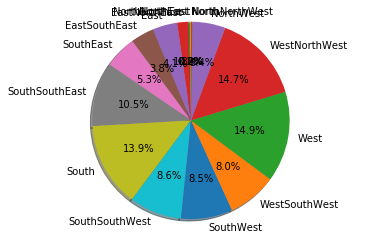

In [20]:
piechart_labels = 'North', 'NorthNorthEast', 'NorthEast', 'EastNorthEast', 'East', 'EastSouthEast', 'SouthEast', 'SouthSouthEast', 'South', 'SouthSouthWest', 'SouthWest', 'WestSouthWest', 'West', 'WestNorthWest', 'NorthWest', 'NorthNorthWest'
piechart_sizes = [countN, countNNE, countNE, countENE, countE, countESE, countSE, countSSE, countS, countSSW, countSW, countWSW, countW, countWNW, countNW, countNNW]
fig1, ax1 = plt.subplots()
ax1.pie(piechart_sizes,labels=piechart_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()


In [21]:
max(weather_df['Wind Direction'])

336.46

In [22]:
winddir_dict = {countN : North,countNNE : NorthNorthEast, countNE : NorthEast, countENE : EastNorthEast, countE : East, countESE : EastSouthEast, countSE : SouthEast, countSSE : SouthSouthEast, countS : South, countSSW : SouthSouthWest, countSW : SouthWest, countWSW : WestSouthWest, countW : West, countWNW : WestNorthWest, countNW : NorthWest, countNNW : NorthNorthWest }
high = []
moderate = []
low = []
for key, value in winddir_dict.items():
    if((key / len(weather_df)) * 100 >= 10):
        high.append(value)
    if(5 <= (key / len(weather_df)) * 100 < 10):
        moderate.append(value)
    if((0 <= key / len(weather_df)) * 100 < 5):
        low.append(value)
print(low)

[]


In [23]:

model = GradientBoostingClassifier(n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, weather_df, labels, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Mean Accuracy: 0.985 (0.018)


In [24]:

collections.Counter(labels)

Counter({2: 352, 1: 247, 0: 288})

In [25]:
max(weather_df["Wind Speed"])

38.0

In [26]:
min(weather_df["Wind Speed"])

4.2

In [27]:
windspeed = weather_df["Wind Speed"]
counthigh = 0
countlow = 0
for j in range(len(windspeed.values)):
    if(windspeed.values[j] > 20):
        counthigh += 1
    else:
        countlow += 1
print("counthigh=%d" % (counthigh))
print("countlow=%d" % (countlow))

counthigh=193
countlow=694


In [28]:
weather_df2 = weather_df.copy()


In [29]:
rfdict['Wind Speed']

0.05836732835879623

In [30]:
rfdict['Relative Humidity']

0.0394805793114516

In [31]:
winddir_df2 = weather_df2["Wind Direction"]
windspeed_df2 = weather_df2["Wind Speed"]
asthma_risk = []
print(len(winddir_df2))
if(rfdict['Wind Speed'] > rfdict['Relative Humidity']):
    for k in range(len(winddir_df2.values)):
        if(min(min(moderate)) <= winddir_df2.values[k] <= max(max(high))):
            if(windspeed_df2.values[k]>=20):
                asthma_risk.append("High")
            if(10 <= windspeed_df2.values[k] < 20):
                asthma_risk.append("Moderate")
            if(4 <= windspeed_df2.values[k] < 10):
                asthma_risk.append("Low")
        if(0 <= winddir_df2.values[k] <min(min(moderate)) or 300 <= winddir_df2.values[k] <= 360):
            if(windspeed_df2.values[k]>=20):
                asthma_risk.append("Moderate")
            if(10 <= windspeed_df2.values[k] < 20):
                asthma_risk.append("Low")
            if(4 <= windspeed_df2.values[k] < 10):
                asthma_risk.append("Low")
    print(len(asthma_risk))
else:
    print("HEllo")

887
887


In [32]:
weather_df2["Asthma Risk"] = asthma_risk

In [33]:
collections.Counter(weather_df2["Asthma Risk"])

Counter({'High': 185, 'Moderate': 446, 'Low': 256})

In [34]:
weather_df2

,Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Visibility,Cloud Cover,Relative Humidity,Asthma Risk
0,30.4,18.7,24.7,4.1,0.0,0.0,17.28,27.5,295.00,9.9,37.6,50.14,High
1,38.7,19.3,29.6,10.0,0.0,0.0,15.23,18.7,290.58,9.9,29.6,45.90,Moderate
2,41.7,13.2,29.1,8.1,0.0,0.0,13.58,8.8,137.00,9.9,56.4,50.00,Low
3,43.7,31.5,36.3,24.8,0.0,0.0,12.00,15.4,84.63,9.9,45.8,46.27,Low
4,46.8,19.9,35.2,16.0,0.0,0.0,9.93,9.9,302.25,9.9,33.8,47.48,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,60.2,37.3,51.6,25.1,0.0,0.0,0.00,30.1,264.71,9.9,43.7,41.55,High
1458,38.0,24.2,30.4,10.1,0.0,0.0,0.00,30.3,287.50,9.9,33.4,43.33,High
1459,39.6,20.9,31.5,6.5,0.0,0.0,0.00,29.0,291.21,9.9,68.8,47.30,High
1460,28.8,11.9,20.2,-4.7,0.0,0.0,0.00,22.7,286.79,9.9,30.3,37.28,High


In [35]:

label_encoding = preprocessing.LabelEncoder()
weather_df2["Asthma Risk"] = label_encoding.fit_transform(weather_df2["Asthma Risk"].astype(str))
weather_df2["Asthma Risk"][14]

2

In [36]:
X = weather_df2.drop(['Asthma Risk'], axis = 1)
Y = weather_df2['Asthma Risk']
X.columns

Index(['Maximum Temperature', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Precipitation', 'Snow', 'Snow Depth', 'Wind Speed',
       'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity'],
      dtype='object')

In [37]:
model1 = GradientBoostingClassifier(n_estimators=100)
cv1 = RepeatedStratifiedKFold(n_splits=20, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(model1, X, Y, scoring='accuracy', cv=cv1, n_jobs=-1)
print('Mean Accuracy: %.3f (%.3f)' % (mean(n_scores1), std(n_scores1)))

Mean Accuracy: 0.995 (0.010)


In [38]:

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [39]:
x_train.shape, x_test.shape

((709, 12), (178, 12))

In [40]:

logistic_model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [41]:
print("Training score: ", logistic_model.score(x_train,y_train))

Training score:  0.8222849083215797


In [42]:
y_pred = logistic_model.predict(x_test)

In [43]:

print("Testing score: ", accuracy_score(y_test, y_pred))

Testing score:  0.8258426966292135


In [44]:

nb_model = GaussianNB().fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)


In [45]:
print("Testing score: ", accuracy_score(y_test, y_pred_nb))

Testing score:  0.8146067415730337


In [46]:
print("Training score: ", nb_model.score(x_train,y_train))

Training score:  0.8166431593794076


In [47]:

dt_model = DecisionTreeClassifier().fit(x_train, y_train)
y_pred_dt = dt_model.predict(x_test)

In [48]:
print("Training score: ", dt_model.score(x_train,y_train))

Training score:  1.0


In [49]:
print("Testing score: ", accuracy_score(y_test, y_pred_dt))

Testing score:  0.9943820224719101


In [50]:

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
y_pred_svc = svclassifier.predict(x_test)

In [52]:

print(confusion_matrix(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))

[[37  0  2]
 [ 0 46 11]
 [ 3  7 72]]
             precision    recall  f1-score   support

          0       0.93      0.95      0.94        39
          1       0.87      0.81      0.84        57
          2       0.85      0.88      0.86        82

avg / total       0.87      0.87      0.87       178



In [53]:
len(labels)

887

In [54]:
weather_df['target'] = labels

In [55]:
X1 = weather_df.drop(['target'], axis = 1)
Y1 = weather_df['target']
X1.columns

Index(['Maximum Temperature', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Precipitation', 'Snow', 'Snow Depth', 'Wind Speed',
       'Wind Direction', 'Visibility', 'Cloud Cover', 'Relative Humidity'],
      dtype='object')

In [56]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)
X1_train.shape, X1_test.shape

((709, 12), (178, 12))

In [57]:
logistic_model_target = LogisticRegression(solver='liblinear').fit(X1_train, Y1_train)
Y1_pred = logistic_model_target.predict(X1_test)

In [58]:
print("Testing score: ", accuracy_score(Y1_test, Y1_pred))

Testing score:  0.9213483146067416


In [59]:
print("Training score: ", logistic_model_target.score(X1_train, Y1_train))

Training score:  0.919605077574048


In [60]:
nb_model_target = GaussianNB().fit(X1_train, Y1_train)
Y1_pred_nb = nb_model_target.predict(X1_test)

In [61]:
print("Testing score: ", accuracy_score(Y1_test, Y1_pred_nb))

Testing score:  0.9269662921348315


In [62]:
print("Training score: ", nb_model_target.score(X1_train, Y1_train))

Training score:  0.8956276445698167


In [63]:
svclassifier_target = SVC(kernel='linear')
svclassifier_target.fit(X1_train, Y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [64]:
Y1_pred_svc = svclassifier_target.predict(X1_test)

In [65]:
print(confusion_matrix(Y1_test,Y1_pred_svc))
print(classification_report(Y1_test,Y1_pred_svc))

[[44  0  0]
 [ 0 54  0]
 [ 0  0 80]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        44
          1       1.00      1.00      1.00        54
          2       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00       178



In [66]:
collections.Counter(labels)

Counter({2: 352, 1: 247, 0: 288})

In [67]:
mlp_clf = MLPClassifier(hidden_layer_sizes=(100,),
                        max_iter=1000,
                        activation='logistic',
                        alpha=0.001,
                        solver='lbfgs',
                        verbose=True)

In [68]:
mlp_clf.fit(x_train, y_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [69]:
y_pred_mlp = mlp_clf.predict(x_test)

In [70]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred_mlp})
pred_results.sample(10)

,y_test,y_pred
1094,0,0
1346,2,2
1424,2,2
979,1,1
642,2,0
723,1,2
275,2,2
392,2,2
1040,2,2
4,1,1


In [71]:
accuracy_score(y_test, y_pred_mlp)

0.8820224719101124

In [72]:
asthma_risk_crosstab = pd.crosstab(pred_results.y_test, pred_results.y_pred)
asthma_risk_crosstab

y_pred,0,1,2
y_test,,,
0,36,0,3
1,0,47,10
2,5,3,74


In [81]:
True_pos = asthma_risk_crosstab[2][2]
False_neg = asthma_risk_crosstab[1][2]
False_pos = asthma_risk_crosstab[2][1]
True_neg = asthma_risk_crosstab[1][1]

print("\n True Positive : ",True_pos)
print("\n False Negative : ",False_neg)
print("\n False Positive : ",False_pos)
print("\n True Negative : " ,True_neg)


 True Positive :  74

 False Negative :  3

 False Positive :  10

 True Negative :  47


In [82]:
accuracy =  (True_pos + True_neg)/(True_pos + True_neg + False_pos + False_neg)
error_rate = (False_pos + False_neg)/(True_pos + True_neg + False_pos + False_neg)
precision = True_pos/(True_pos+False_neg) 
recall = True_pos/(True_pos+False_pos)
TPR = True_pos/(True_pos+ False_neg)
FPR = False_pos/(True_neg+False_pos)


print("\n Accuracy: " ,accuracy)
print("\n Error Rate : " ,error_rate)
print("\n TPR : " ,TPR)
print("\n FPR : " ,FPR)
print("\n precision : " ,precision)
print("\n recall : " ,recall)


 Accuracy:  0.9029850746268657

 Error Rate :  0.09701492537313433

 TPR :  0.961038961038961

 FPR :  0.17543859649122806

 precision :  0.961038961038961

 recall :  0.8809523809523809


In [83]:
x00, y00 = 0, 0
x11, y11 = FPR, TPR
x22, y22 = 1, 1

AUC1 = ((x11 - x00) * (y11 + y00)) / 2 
AUC2 = ((x22 - x11) * (y22 + y11)) / 2 
ROC_AUC  = AUC1 + AUC2
print(ROC_AUC)

0.8928001822738665


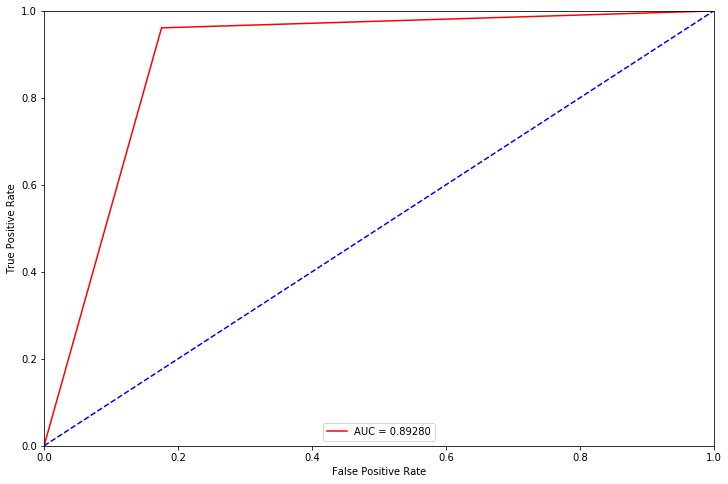

In [84]:
plt.figure(figsize=(12,8))
plt.plot([0, FPR, 1], [0, TPR, 1], 'r', label = 'AUC = %.5f' %ROC_AUC)
plt.legend(loc = 'lower center')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [75]:
mlp_clf.fit(X1_train, Y1_train)

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
       verbose=True, warm_start=False)

In [76]:
y_pred_target_mlp = mlp_clf.predict(X1_test)

In [77]:
pred_results_target = pd.DataFrame({'y_test': Y1_test,
                             'y_pred': y_pred_target_mlp})
pred_results_target.sample(10)

,y_test,y_pred
329,2,2
1457,2,2
784,1,1
401,2,2
1364,0,0
253,1,0
336,0,0
967,2,2
1330,1,1
273,2,2


In [86]:
asthma_risk_crosstab_target = pd.crosstab(pred_results_target.y_test, pred_results_target.y_pred)
asthma_risk_crosstab_target

y_pred,0,1,2
y_test,,,
0,43,0,1
1,4,50,0
2,2,0,78


In [87]:
True_pos_target = asthma_risk_crosstab_target[2][2]
False_neg_target = asthma_risk_crosstab_target[0][2]
False_pos_target = asthma_risk_crosstab_target[2][0]
True_neg_target = asthma_risk_crosstab_target[0][0]

print("\n True Positive : ",True_pos_target)
print("\n False Negative : ",False_neg_target)
print("\n False Positive : ",False_pos_target)
print("\n True Negative : " ,True_neg_target)


 True Positive :  78

 False Negative :  2

 False Positive :  1

 True Negative :  43


In [89]:
x00_target, y00_target = 0, 0
x11_target, y11_target = FPR_target, TPR_target
x22_target, y22_target = 1, 1

AUC1_target = ((x11_target - x00_target) * (y11_target + y00_target)) / 2 
AUC2_target = ((x22_target - x11_target) * (y22_target + y11_target)) / 2 
ROC_AUC_target  = AUC1_target + AUC2_target
print(ROC_AUC_target)

0.9761363636363637


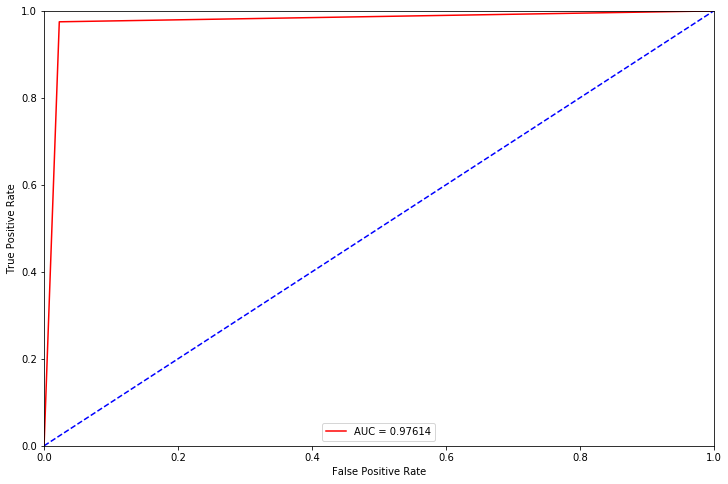

In [91]:
plt.figure(figsize=(12,8))
plt.plot([0, FPR_target, 1], [0, TPR_target, 1], 'r', label = 'AUC = %.5f' %ROC_AUC_target)
plt.legend(loc = 'lower center')
plt.plot([0, 1], [0, 1],'b--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [88]:
accuracy_target =  (True_pos_target + True_neg_target)/(True_pos_target + True_neg_target + False_pos_target + False_neg_target)
error_rate_target = (False_pos_target + False_neg_target)/(True_pos_target + True_neg_target + False_pos_target + False_neg_target)
precision_target = True_pos_target/(True_pos_target+False_neg_target) 
recall_target = True_pos_target/(True_pos_target+False_pos_target)
TPR_target = True_pos_target/(True_pos_target+ False_neg_target)
FPR_target = False_pos_target/(True_neg_target+False_pos_target)


print("\n Accuracy: " ,accuracy_target)
print("\n Error Rate : " ,error_rate_target)
print("\n TPR : " ,TPR_target)
print("\n FPR : " ,FPR_target)
print("\n precision : " ,precision_target)
print("\n recall : " ,recall_target)


 Accuracy:  0.9758064516129032

 Error Rate :  0.024193548387096774

 TPR :  0.975

 FPR :  0.022727272727272728

 precision :  0.975

 recall :  0.9873417721518988


In [78]:
accuracy_score(Y1_test, y_pred_target_mlp)

0.9606741573033708

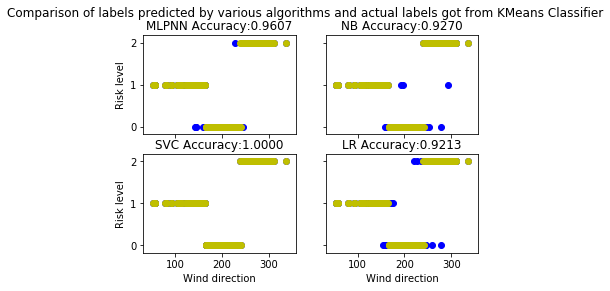

In [79]:
fig, axs = plt.subplots(2, 2)
fig.suptitle("Comparison of labels predicted by various algorithms and actual labels got from KMeans Classifier")
axs[0, 0].scatter(X1_test["Wind Direction"], y_pred_target_mlp, c="b")
axs[0, 0].scatter(X1_test["Wind Direction"],Y1_test,c="y")
axs[0, 0].set_title('MLPNN Accuracy:%.4f'%accuracy_score(Y1_test, y_pred_target_mlp))
axs[0, 1].scatter(X1_test["Wind Direction"], Y1_pred_nb, c="b")
axs[0, 1].scatter(X1_test["Wind Direction"],Y1_test,c="y")
axs[0, 1].set_title('NB Accuracy:%.4f'%accuracy_score(Y1_test, Y1_pred_nb))
axs[1, 0].scatter(X1_test["Wind Direction"], Y1_pred_svc, c="b")
axs[1, 0].scatter(X1_test["Wind Direction"],Y1_test,c="y")
axs[1, 0].set_title('SVC Accuracy:%.4f'%accuracy_score(Y1_test, Y1_pred_svc))
axs[1, 1].scatter(X1_test["Wind Direction"], Y1_pred, c="b")
axs[1, 1].scatter(X1_test["Wind Direction"],Y1_test,c="y")
axs[1, 1].set_title('LR Accuracy:%.4f'%accuracy_score(Y1_test, Y1_pred))

for ax in axs.flat:
    ax.set(xlabel='Wind direction', ylabel='Risk level')


for ax in axs.flat:
    ax.label_outer()

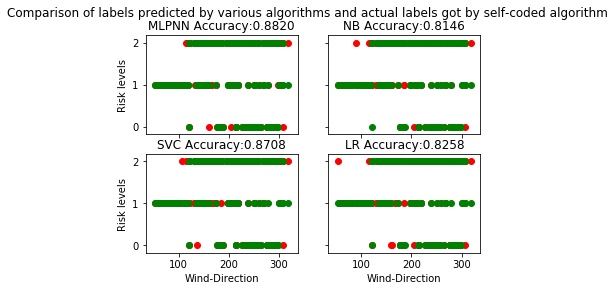

In [80]:
fig1, axs1 = plt.subplots(2, 2)
fig1.suptitle("Comparison of labels predicted by various algorithms and actual labels got by self-coded algorithm")
axs1[0, 0].scatter(x_test['Wind Direction'], y_pred_mlp, c="r")
axs1[0, 0].scatter(x_test['Wind Direction'], y_test,c="g")
axs1[0, 0].set_title('MLPNN Accuracy:%.4f'%accuracy_score(y_test, y_pred_mlp))
axs1[0, 1].scatter(x_test['Wind Direction'], y_pred_nb, c="r")
axs1[0, 1].scatter(x_test['Wind Direction'], y_test,c="g")
axs1[0, 1].set_title('NB Accuracy:%.4f'%accuracy_score(y_test, y_pred_nb))
axs1[1, 0].scatter(x_test['Wind Direction'], y_pred_svc, c="r")
axs1[1, 0].scatter(x_test['Wind Direction'], y_test,c="g")
axs1[1, 0].set_title('SVC Accuracy:%.4f'%accuracy_score(y_test, y_pred_svc))
axs1[1, 1].scatter(x_test['Wind Direction'], y_pred, c="r")
axs1[1, 1].scatter(x_test["Wind Direction"],y_test,c="g")
axs1[1, 1].set_title('LR Accuracy:%.4f'%accuracy_score(y_test, y_pred))

for ax1 in axs1.flat:
    ax1.set(xlabel='Wind-Direction', ylabel='Risk levels')

for ax1 in axs1.flat:
    ax1.label_outer()